<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h6><center>M.Sc. DSBA & AI</center></h6>
<h3><center>Ensemble learning from theory to practice</center></h3>


<h1>
<hr style=" border:none; height:3px;">
<center>Lab 1 & 2: Decision Trees & Bagging</center>
<hr style=" border:none; height:3px;">
</h1>

__Teacher__: Myriam Tami

# Introduction


This lab consists of two parts. In the first part, we're going to experiment decision trees approach on both simulated and real data; in the second part, we're going to perform random forest.

This lab is free from some of the examples shown in the `Scikit-Learn` [global documentation](https://scikit-learn.org/stable/modules/tree.html) and documentation on [random forests for the regression case](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) and [random forests for classification problems](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


The objectives of this practical session is tofold:
 + use decision trees for classification and regression problems in python (`sklearn` module);
 + use **bagging** and **random forests** approaches for classification and regression problems in python (`sklearn` module).

Useful reference links:
+ [`Scikit-learn` website](https://scikit-learn.org/stable/index.html)
+ [`NumPy` documentation](https://docs.scipy.org/doc/numpy/user/index.html)
+ [`SciPy` documentation](https://docs.scipy.org/doc/scipy/reference/)
+ [`MatPlotLib` documentation](https://matplotlib.org/)
+ [Python website](https://www.python.org/)


# 1. Decision trees

Decision trees are learning methods used for classification and regression prediction problems. The goal is to create a model that predicts the values of the output variable, based on a set of sequences of decision rules (formaly a set of split points) deduced from the training data. The tree therefore approximates the output by a succession of if-then-else rules (leading to terminal nodes). This paradigm works well for both categorical and numerical data. The more complex the generated tree, the more the model "explains"/fits the training data but also the more the chances of overfitting.

**Advantages of decision trees**
+ They are simple to understand and visualize
+ They require little data preparation (standardization, etc.)
+ The cost of using trees is logarithmic
+ They are able to manage categorical and numerical data
+ They are able to deal with multi-class problems
+ White box model: the result is easy to conceptualize and visualize

**Disadvantages of decision trees**

+ Overfitting: sometimes the trees generated are too complex and generalize poorly. Choosing the right values for the maximum depth (`max_depth`) and minimum number of examples per leaf (`min_samples_leaf`) parameters avoids this problem.
+ Sometimes the trees generated are not balanced. It is therefore recommended to adjust the database before construction, to avoid one class largely dominating the others (in terms of the number of training examples).

#### 1.0. Python dependencies and setup

You will need to install some packages allowing to visualize some results of this lab. Run the following command.




In [18]:
pip install graphviz

You should consider upgrading via the '/Users/theob/Desktop/github/Ensemble-Learning-Exercices/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pydot

You should consider upgrading via the '/Users/theob/Desktop/github/Ensemble-Learning-Exercices/venv/bin/python3 -m pip install --upgrade pip' command.


In [3]:
!pip install pydotplus

You should consider upgrading via the '/Users/theob/Desktop/github/Ensemble-Learning-Exercices/venv/bin/python3 -m pip install --upgrade pip' command.


In [4]:
!pip install scikit-learn

You should consider upgrading via the '/Users/theob/Desktop/github/Ensemble-Learning-Exercices/venv/bin/python3 -m pip install --upgrade pip' command.


In [5]:
!pip install pandas

You should consider upgrading via the '/Users/theob/Desktop/github/Ensemble-Learning-Exercices/venv/bin/python3 -m pip install --upgrade pip' command.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


import numpy as np
import pandas as pd


# Matplotlib is used to plot graphs
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Style options for plots.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



#### 1.1. Classification Decision Trees

In Scikit-learn, the class [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) allows to make a multi-class classification on a database. This class needs as input a matrix X of size `[n_samples, n_features]` containing the data and a vector Y of size `[n_samples]` with the values of the target (output) class.

We start by importing the right modules and building the tree object:


In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

The data:

In [3]:
X = [[0, 0], [1, 1]]
Y = [0, 1]

Model construction (model will be nammed clf):


In [4]:
clf = clf.fit(X, Y)


Prediction on new samples:


In [5]:
clf.predict([[2., 2.]])

array([1])

We can also predict the probability of each class for a sample (which is calculated as the fraction of training data in each terminal node):

In [6]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

#### Iris data classification

DecisionTreeClassifier is able to handle classification problems with several classes (for example, with labels 0, 1,… K-1). In this example we will work with the [Iris](https://archive.ics.uci.edu/ml/datasets/Iris) database, easily accessible in sklearn. This database contains 3 classes of 150 observations, each class referring to a variety of iris (plant). One of the classes is linearly separable from the other two, but the other two are not separable one from the other. The variable to predict is the variety of iris.

Attributes:
+ sepal length in cm
+ sepal width in cm
+ petal length in cm
+ petal width in cm
+ class: Iris Setosa, Iris Versicolour, Iris Virginica

One sample from the database: 4.9,3.6,1.4,0.1, “Iris-setosa”

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(iris.data, iris.target)

In [8]:
pip install pydotplus

You should consider upgrading via the '/Users/theob/Desktop/github/Ensemble-Learning-Exercices/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Once learning is complete we can view the tree created using the `graphviz` tool. To display it, we create a function `create_tree_graph_png()`:

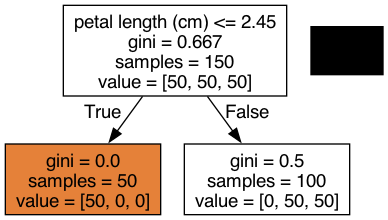

In [10]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Function to create a tree diagram
def create_tree_graph_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png('tree.png')
    return Image(graph.create_png())

# Display the tree
create_tree_graph_png(clf, feature_names= iris.feature_names)

The generated image looks like this:

<figure>
<center><img src='https://github.com/myriamtami/ML-Labs/blob/master/Figures/Iris_Tree.png?raw=true' width=1000></center>
</figure>



After its construction, the model can be used for prediction:

In [11]:
print(clf.predict(iris.data[:1, :]))
print(clf.predict_proba(iris.data[:1, :]))

[0]
[[1. 0. 0.]]


In [12]:
iris.data[:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

<div class="alert alert-block alert-success">

**Question 1.** Change the parameter values `max depth` and `min_samples_leaf`. What do you observe?

</div>

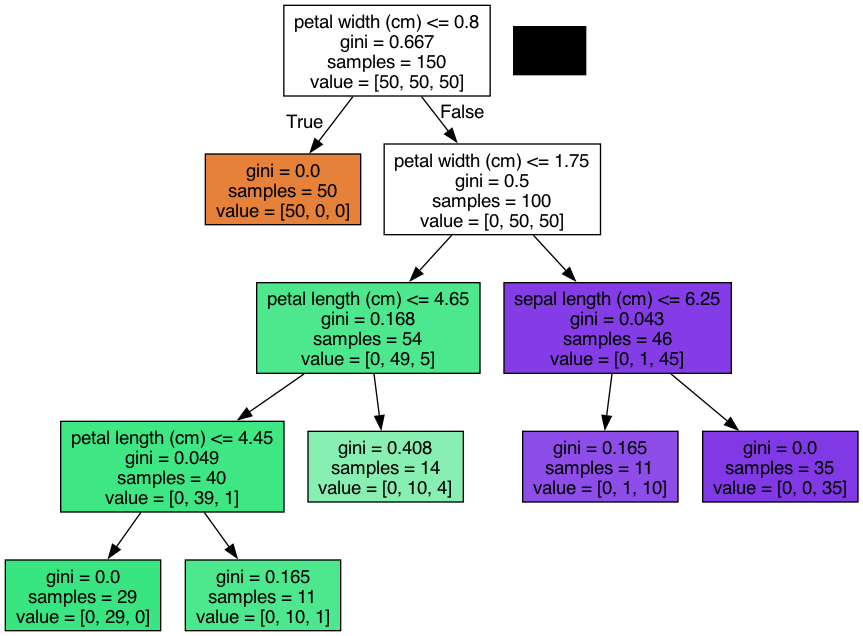

In [21]:
clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)
clf = clf.fit(iris.data, iris.target)
# Display the tree
create_tree_graph_png(clf, feature_names= iris.feature_names)

When we change the max_depth, it changes how deep the tree goes. It is an hyper-parameter that is used to simplify or complexify a model. The hyper-parameter min_samples_leaf will simplify or complexify the model.

<div class="alert alert-block alert-success">

**Question 2.** Split randomly the database into training/testing sets (70% training, 30% testing) and calculate the rate of misclassified items on the test set. Vary the values of the `max_depth` and `min_samples_leaf` parameters to see their impact on this score.

</div>


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Function to train a model and evaluate misclassification rate
def evaluate_model(max_depth, min_samples_leaf):
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    misclassification_rate = 1 - accuracy
    return misclassification_rate

# Varying max_depth and min_samples_leaf and observing the impact
depths = [3, 5, 10, None] # None means unlimited depth
min_samples = [1, 2, 4, 6, 8]

for depth in depths:
    for min_sample in min_samples:
        misclass_rate = evaluate_model(depth, min_sample)
        print(f"Max depth: {depth}, Min samples leaf: {min_sample}, Misclassification Rate: {misclass_rate:.4f}")


Max depth: 3, Min samples leaf: 1, Misclassification Rate: 1.0000
Max depth: 3, Min samples leaf: 2, Misclassification Rate: 1.0000
Max depth: 3, Min samples leaf: 4, Misclassification Rate: 1.0000
Max depth: 3, Min samples leaf: 6, Misclassification Rate: 1.0000
Max depth: 3, Min samples leaf: 8, Misclassification Rate: 1.0000
Max depth: 5, Min samples leaf: 1, Misclassification Rate: 1.0000
Max depth: 5, Min samples leaf: 2, Misclassification Rate: 1.0000
Max depth: 5, Min samples leaf: 4, Misclassification Rate: 1.0000
Max depth: 5, Min samples leaf: 6, Misclassification Rate: 1.0000
Max depth: 5, Min samples leaf: 8, Misclassification Rate: 1.0000
Max depth: 10, Min samples leaf: 1, Misclassification Rate: 1.0000
Max depth: 10, Min samples leaf: 2, Misclassification Rate: 1.0000
Max depth: 10, Min samples leaf: 4, Misclassification Rate: 1.0000
Max depth: 10, Min samples leaf: 6, Misclassification Rate: 1.0000
Max depth: 10, Min samples leaf: 8, Misclassification Rate: 1.0000
Max d

To search for good values for the parameters you can use cross validation with GridSearchCV:

In [24]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)

from sklearn.model_selection import GridSearchCV

pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}

grid_search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_.score(X_test, y_test))

{'max_depth': 3, 'min_samples_split': 2}
0.9777777777777777


**Display of the decision surface**

For a pair of attributes we can visualize the decision surface in 2 dimensions. First we discretize the two-dimensional domain with a constant step and then we evaluate the model on each point of the grid.

/var/folders/dj/drqjc_c134xgs5ns31syhsm40000gn/T/ipykernel_75766/1704224189.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)


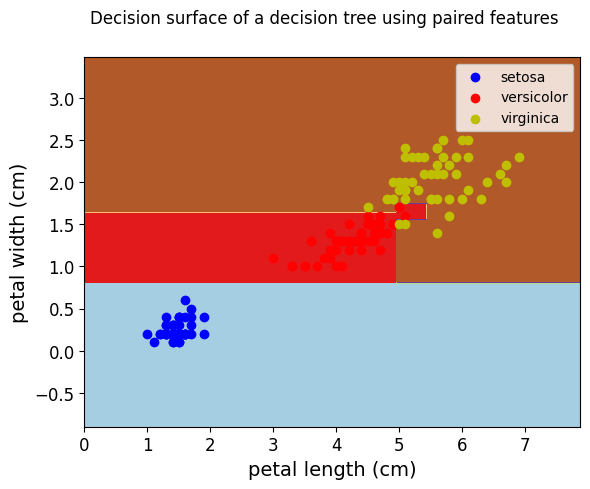

In [25]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Load the data
iris = load_iris()

# Choose the attributes length and width of the petals
pair = [2, 3]

# Keep only the two attributes
X = iris.data[:, pair]
y = iris.target

# Classification Decision Tree learning
clf = DecisionTreeClassifier().fit(X, y)

# Display of the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Display of training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.savefig('fig.png')
plt.show()

<div class="alert alert-block alert-success">

**Question 3.** Redo the display for the other attribute pairs. On which pair is the separation between the classes most marked?

</div>


#### 1.2. Regression Decision Trees

For regression with decision trees, Scikit-learn offers the `DecisionTreeRegressor` class. As for the classification, the `fit()` method takes as input the parameter X (attributes of the observations). Please note: the y value are not class labels but real (numerical) values.

In [41]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

In the following example we will build a sine wave signal affected by white noise and we will learn a regression tree on this training data.

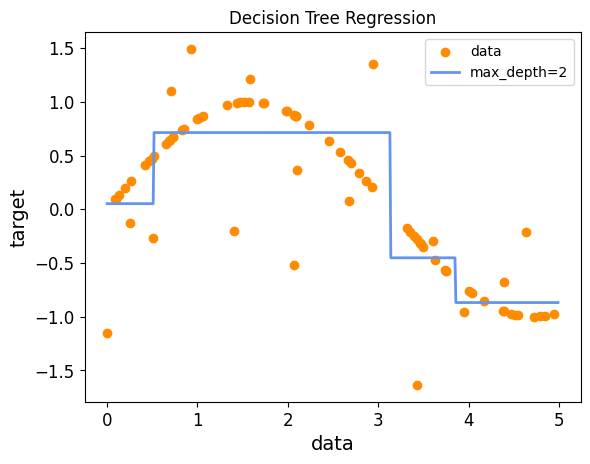

In [42]:
from sklearn.tree import DecisionTreeRegressor


# Create training data
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Learn the model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [43]:
print(len(y))
print(len(y[::5]))

80
16


<div class="alert alert-block alert-success">

**Question 4.** Change the value of the `max_depth` parameter. What happens if we take a too large value? Too small ? Change the rate of elements affected by noise (`y[:: 5]`). When all the elements are affected by noise, should we prefer a high or low value for `max_depth`?

</div>

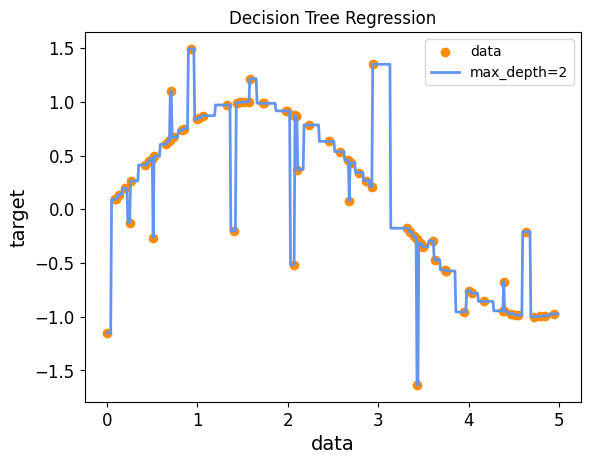

In [44]:
# Learn the model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

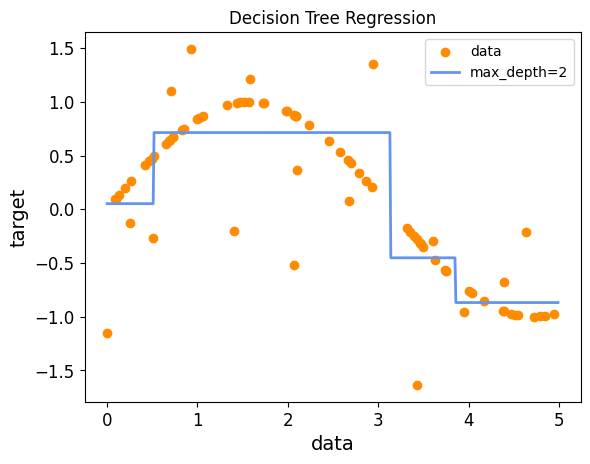

In [45]:
# Learn the model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

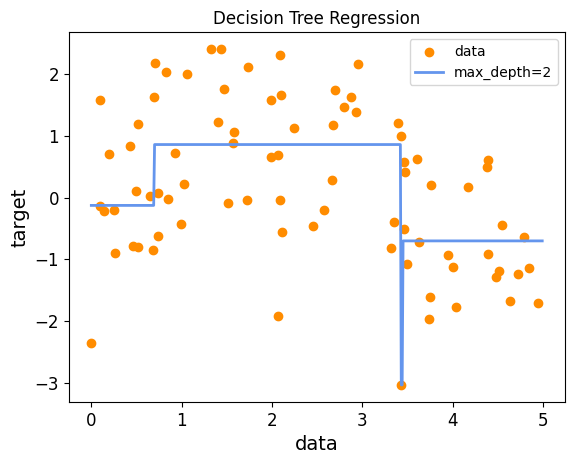

In [46]:
#FULL NOISE
y[::] += 3 * (0.5 - rng.rand(80))
# Learn the model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

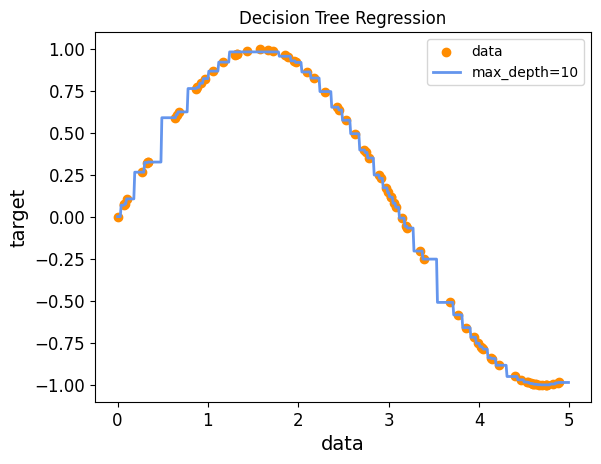

In [47]:
#ZERO NOISE
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# Learn the model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(X, y)

# Prediction
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Display the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=10", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

<div class="alert alert-block alert-success">

**Question 5.** Load the Diabetes database from the `sklearn.datasets` module and make a random partition in the training part and the test part (70% training, 30% test). Build a regression tree model on the training set. Calculate the mean square error on the test set. Do a grid search to find the value of the `max_depth` parameter which minimizes this error.

</div>

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

dtr = DecisionTreeRegressor(random_state=42)

pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
         "min_samples_split": [2, 3, 5, 10, 15, 20]
         }
grid_search = GridSearchCV(dtr, param_grid=pgrid, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_.score(X_test, y_test))

{'max_depth': 2, 'min_samples_split': 2}
0.35541943734175174


# 2. Random Forest & Bagging



### Ensemble methods

The ensemble methods for statistical learning algorithms (ie: ensemble learning) are based on the idea of combining the predictions of several predictors (or classifiers) for better generalization and to compensate for any defects of individual predictors.

Usually, there are two families of such methods:

   1. Averaging (aggregating is a more appropriate word) methods (such as bagging and random forests) where the principle is to average several predictions while hoping for a better result following the reduction in variance of the average estimator (note that for the classification case, we consider the majority vote).
   2. Adaptive methods (boosting) where the parameters are iteratively adapted to produce a better mixture (we will introduce them through the 3rd lecture).

In the following we will explore the algorithm classes cited in the first point using `Scikit-learn` and present some comparisons.

### Bagging

Bagging methods build several instances of an estimator, computed on random samples taken from the learning base (and possibly a part of the attributes, also randomly selected), and then combines the individual predictions by averaging them to reduce the variance of the estimator. Their main advantage lies in the fact that they build an improved version of the basic algorithm, without asking for modification of this algorithm. The price to pay is a higher computation cost.

In `Scikit-learn`, the bagging methods are implemented via both the `BaggingClassifier` and `BaggingRegressor` class. The constructors take as parameters a basic estimator and the strategy for selecting points and attributes:

+ `base_estimator`: optional (default = None). If None then the estimator is a decision tree.
+ `max_samples`: the size of the random sample taken from the learning database.
+ `max_features`: the number of attributes drawn at random.
+ `bootstrap`: boolean, optional (default = True). Draw data points $(x_i,y_i)$ with replacement or not.
+ `bootstrap_features`: boolean, optional (default = False). Attributes drawing with replacement or not.
+ `oob_score`: boolean. Estimate or not the OOB (Out-of-Bag) generalization error.

The following code builds a set of basic `KNeighborsClassifier` classifiers, each using a 50% sample of learning data points and 50% of the attributes (features):

In [50]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In this example we will use the digits database, which contains 10 classes (images of numbers in handwriting). There are 1797 instances, each instance has 64 attributes.

(1797, 64)


<Figure size 640x480 with 0 Axes>

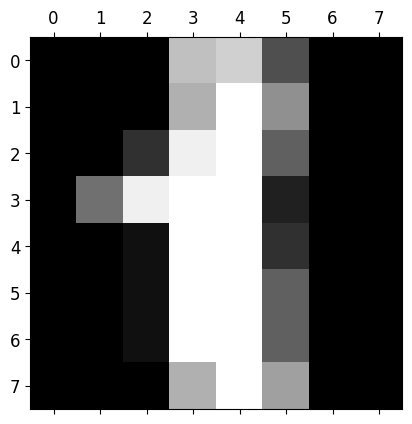

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
# Display one picture
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

The basic classifier is a decision tree:

In [52]:
X=digits.data
y=digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy=clf.score(X,y)
print('accuracy ', accuracy)

accuracy  1.0


On the learning set, accuracy = 1. For more realism, we split the learning set into a train/test set in order to see the behavior of the tree on new data (different from that of training):

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print('accuracy ', accuracy)

accuracy  0.6666666666666666


<div class="alert alert-block alert-success">

**Question 6.** Compute the mean and the variance of the `accuracy` value on 100 draws for the train/test splitting. Compute then the standard deviation and the confidence interval with 95 $\%$ probability of containing the true mean parameter. What can we conclude?

</div>

In [61]:
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
X=digits.data
y=digits.target
N = 100
accuracy = np.zeros(N)

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
    # Complete the code
    clf = tree.DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracy_value=clf.score(X_test,y_test)
    accuracy[i]= accuracy_value

# Print the mean and standard deviation of accuracy
print("accuracy_mean:", accuracy.mean(), "accuracy_std:", accuracy.std(), "accuracy_var:", accuracy.var())

accuracy_mean: 0.6733703703703704 accuracy_std: 0.02975526604382525 accuracy_var: 0.00088537585733882


To compare, we will build a bagging classifier on our data with a basic `DecisionTreeClassifier` classifier (two trees are proposed here; one tree with more random through the option `max_features=0.5`):

In [62]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, n_estimators=100)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)
print("Accuracy of bagging classifier ", accuracy)

clf_more_rd = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=100)
clf_more_rd.fit(X_train, y_train)
Z_more_rd = clf_more_rd.predict(X_test)
accuracy_more_rd=clf_more_rd.score(X_test,y_test)
print("Accuracy of bagging classifier with more random ", accuracy_more_rd)

Accuracy of bagging classifier  0.9555555555555556
Accuracy of bagging classifier with more random  0.9722222222222222


<div class="alert alert-block alert-success">

**Question 7.** Compute the variance of the accuracy value on 100 draws for the train/test splitting. Compare with the variance of the base classifier. What can we conclude?

</div>

In [63]:
# Write the code here
print("accuracy_variance", accuracy.var())
print("accuracy_more_rd_variance", accuracy_more_rd.var())

accuracy_variance 0.0
accuracy_more_rd_variance 0.0


<div class="alert alert-block alert-success">

**Question 8.** Construct and plot accuracy vs `n_estimators`. What do you observe?

</div>

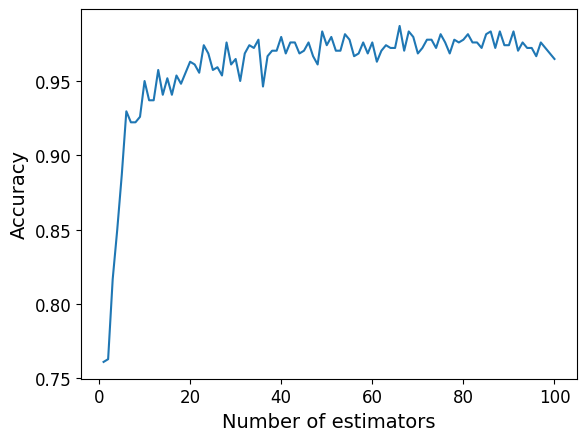

In [67]:
# Write the code here
def accuracy_vs_number_estimators(max_estimators):
    accuracy = np.zeros(max_estimators)
    for i in range(max_estimators):
        clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=i+1)
        clf.fit(X_train, y_train)
        Z = clf.predict(X_test)
        accuracy[i]=clf.score(X_test,y_test)
    return accuracy

max_estimators = 100
accuracy = accuracy_vs_number_estimators(max_estimators)

plt.plot(range(1, max_estimators+1), accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

<div class="alert alert-block alert-success">

**Question 9.** By using cross valisation with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), [tune](https://scikit-learn.org/stable/modules/grid_search.html) (i.e: search for the best values of) both parameters `max_samples` and `max_features` parameters. In other words, search of the values of these parameters allowing to get the best result? For which values do we get this best result?

</div>

In [68]:
# Write the code here
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid={"max_samples": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                                                                                         "max_features": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_features': 0.6, 'max_samples': 0.6}


### Random Forests

The random forest algorithm proposes an aggregation of decision trees. It uses the same principle as bagging, but with an additional step of randomization in the selection of the attributes of the nodes in order to reduce the variance of the obtained estimator. The two Python objects that implement random forests are `RandomForestClassifier` and `RandomForestRegressor`. The most important parameters are:

   1. `n_estimators`: integer, optional (default = 10). The number of trees.
   2. `max_features`: the number of attributes to consider in each split.
   3. `max_samples`: the size of the random sample taken from the learning base.
   4. `min_samples_leaf`: the minimum number of elements in a leaf node.
   5. `oob_score`: boolean. Estimate or not the OOB (Out-of-Bag) generalization error.

Thereafter we will redo the classification based on Digits using a `RandomForestClassifier` classifier:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
digits = load_digits()
X=digits.data
y=digits.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
accuracy=clf.score(X_test,y_test)

<div class="alert alert-block alert-success">

**Question 10.** How does the value of the accuracy variable compare with the bagging case that uses the same number of trees (200 in our case)?

</div>

In [ ]:
# Write the code here

<div class="alert alert-block alert-success">

**Question 11.** Compute the variance of the accuracy value on 100 draws for the train/test splitting. What can we conclude by comparing with the previous section (bagging)?

</div>

In [ ]:
# Write the code here

<div class="alert alert-block alert-success">

**Question 12.** Plot the accuracy vs `n_estimators` graph. What do you notice? From what n_estimators value do we no longer improve?

</div>

In [ ]:
# Write the code here

<div class="alert alert-block alert-success">

**Question 13.** Look in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html) for the [`ExtraTreesClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html) and redo the classification with this type of classifier. Compare with `RandomForestClassifier`.

</div>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Write the code here